In [1]:
# Chapter 21. Neural Networks

In [5]:
# 21.1 Using Autograd with PyTorch

import torch

# create a torch tensor that requires gradients
t =torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Perform a tensor operation simulating "forward propagation"
tensor_sum = t.sum()

# Perform back propagation
tensor_sum.backward()

# View the gradients
t.grad

tensor([1., 1., 1.])

In [8]:
tensor = torch.tensor([1.0,2.0,3.0], requires_grad=True)
tensor.numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [14]:
tensor.detach().numpy()

array([1., 2., 3.], dtype=float32)

In [10]:
# 21.2 Preprocessing Data for Neural Networks
from sklearn import preprocessing
import numpy as np

# create feature
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# create scaler
scaler = preprocessing.StandardScaler()

features_scaled = scaler.fit_transform(features)

# convert to a tensor
features_standardized_tensor = torch.from_numpy(features_scaled)

# show features
features_standardized_tensor


tensor([[-1.1254,  1.9643],
        [-1.1533, -0.5007],
        [ 0.2953, -0.2281],
        [ 0.5739, -0.4234],
        [ 1.4096, -0.8122]], dtype=torch.float64)

In [11]:
features_scaled

array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [17]:
import torch

torch_features = torch.tensor([[-100.1, 3240.1],
                               [-200.2, -234.1],
                               [5000.5, 150.1],
                               [6000.6, -125.1],
                               [9000.9, -673.1]], requires_grad=True)


# Compute the mean and standard deviation
mean = torch_features.mean(0, keepdim=True)
standard_deviation = torch_features.std(0, unbiased=False, keepdim=True)

# Standardize the features using the mean and standard deviation
torch_features_standardized = torch_features - mean
torch_features_standardized /= standard_deviation

# Show standardized features
torch_features_standardized

tensor([[-1.1254,  1.9643],
        [-1.1533, -0.5007],
        [ 0.2953, -0.2281],
        [ 0.5739, -0.4234],
        [ 1.4096, -0.8122]], grad_fn=<DivBackward0>)

In [14]:
mean

tensor([[3940.3403,  471.5800]], grad_fn=<MeanBackward1>)

In [ ]:
# 21.3 Designing a Neural Network

import torch
import torch.nn as nn

# define a neural network
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.fc1 = nn.Linear(10, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 1)

    
    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        return x
    
# Initialize the neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
# Binary cross-entropy
loss_criterion = nn.BCELoss()      # loss function for binary classify

# RMSprob is an optimization algorithm using gradient to update weights
optimizer = torch.optim.RMSprop(network.parameters())

# show the network
network

SimpleNeuralNet(
  (fc1): Linear(in_features=10, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)

In [21]:
import torch

# define a neural network using 'sequential
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.sequential(x)
        return x

# Instantiate and view the network
SimpleNeuralNet()

SimpleNeuralNet(
  (sequential): Sequential(
    (0): Linear(in_features=10, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
# 21.4 Training a Binary Classifier

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create training and test sets
features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)
features_train , features_test, target_train, target_test = train_test_split(
                          features, target, test_size=0.1, random_state=1)


# set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequentail = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequentail(x)
        return x
    
# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.RMSprop(network.parameters())

# Define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Compile the model using torch 2.0's optimizer
network = torch.compile(network, backend="eager")

# train neural network
epochs = 3
for epoch in range(epochs):
    for bach_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()            # compute gradient
        optimizer.step()           # update parameters
    print("Epoch", epoch+1, "\tLoss:", loss.item())

with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:",
    test_accuracy.item())

Epoch 1 	Loss: 0.19006994366645813
Epoch 2 	Loss: 0.14092367887496948
Epoch 3 	Loss: 0.03935524821281433
Test Loss: 0.06877756863832474 	Test Accuracy: 0.9700000286102295


In [34]:
# 21.5 Training a Multiclass Classifier
import torch
import torch.nn as nn
import numpy as np
from torch.optim import RMSprop
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

EPOCHS = 3
N_CLASSES = 3

# Create training and test sets
features, target = make_classification(n_classes=N_CLASSES,
                                       n_informative=9,
                                       n_redundant=0,
                                         n_features=10,
                                           n_samples=1000)
features_train, features_test, target_train, target_test = train_test_split(
                            features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
# y_train = torch.nn.functional.one_hot(torch.from_numpy(target_train).long(),
#                                       num_classes=N_CLASSES ).float()
y_train = torch.from_numpy(target_train).long()
x_test = torch.from_numpy(features_test).float()
y_test = torch.nn.functional.one_hot(torch.from_numpy(target_test).long(),
                                      num_classes=N_CLASSES ).float()

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequentail = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 3),
            torch.nn.Softmax()
        )

    def forward(self, x):
        x = self.sequentail(x)
        return x
    
# Initialize neural network
network = SimpleNeuralNet()

# define loss function, optimizer
criterion = nn.CrossEntropyLoss()
optimizer = RMSprop(network.parameters())

# define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# compile the model using torch optimizer
network = torch.compile(network)

# train neural network
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Epoch", epoch+1, "\tLoss:", loss.item())

# evaluate neuarl network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test Loss:", test_loss.item(), "\tTest Accuracy:",test_accuracy.item())

/home/hasadi/venv/lib/python3.10/site-packages/torch/_dynamo/utils.py:2753: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return fn()


Epoch 1 	Loss: 0.8022043108940125
Epoch 2 	Loss: 0.775616466999054
Epoch 3 	Loss: 0.7751265168190002


/home/hasadi/venv/lib/python3.10/site-packages/torch/_dynamo/utils.py:2753: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return fn()


Test Loss: 0.8105322122573853 	Test Accuracy: 0.8199999928474426


In [35]:
y_train

tensor([0, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
        1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 0,
        2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2,
        0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2,
        0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1,
        1, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 1,
        2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2,
        1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2, 1, 1,
        0, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0,

In [36]:
# 21.6 Training a Regressor

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

EPOCHS=5

# Create training and test sets
features, target = make_regression(n_features=10, n_samples=1000)

features_train, features_test, target_train, target_test = train_test_split(
                            features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# Convert data to PyTorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1,1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1,1)

class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = torch.nn.Sequential(
            torch.nn.Linear(10, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, 1)
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# Define loss function, optimizer
criterion = nn.MSELoss()
optimizer = RMSprop(network.parameters()) 

# define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# compile the model using torch optimizer
network = torch.compile(network)

for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Epoch:", epoch+1, "\tLoss:", loss.item())


# evaluate neuarl network
with torch.no_grad():
    output = network(x_test)
    test_loss = float(criterion(output, y_test))
    print("Test MSE", test_loss)

Epoch: 1 	Loss: 10764.02734375
Epoch: 2 	Loss: 1356.5101318359375
Epoch: 3 	Loss: 504.96636962890625
Epoch: 4 	Loss: 199.11314392089844
Epoch: 5 	Loss: 191.20834350585938
Test MSE 162.24508666992188


In [9]:
# 21.7 Making Predictions

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2,
                                       n_features=10,
                                         n_samples=1000)

features_train, features_test, target_train, target_test = train_test_split(
                            features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# convert data to pytorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(10, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1),   
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# define loss function , optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# compile the model using torch optimizer
network = torch.compile(network)

# train neural network
epochs = 3
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    print("Epoch:", epoch+1, "\tLoss", loss.item())

# evaluate neural network
with torch.no_grad():
    prediced_class = network.forward(x_train).round()

prediced_class[0]

Epoch: 1 	Loss 0.19006989896297455
Epoch: 2 	Loss 0.14092369377613068
Epoch: 3 	Loss 0.03935524821281433


tensor([1.])

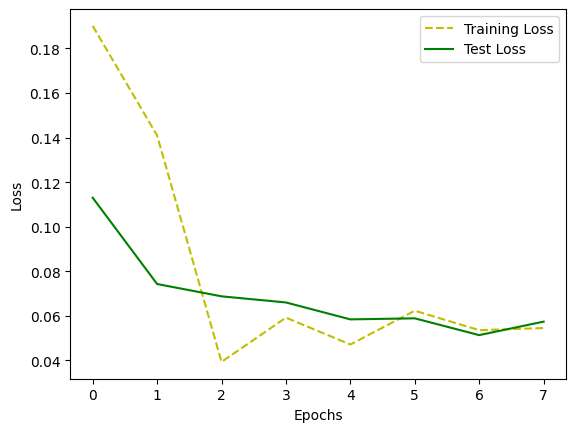

In [ ]:
# 21.8 Visualize Training History
import torch
import torch.nn as nn 
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt

# Create training and test sets
features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

features_train, features_test, target_train, target_test = train_test_split(
                            features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# convert data to pytorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(10, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1),   
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x) 
        return x

# Initialize neural network
network = SimpleNeuralNet()

# define loss function , optimizer
criterion = nn.BCELoss()
optimizer = RMSprop(network.parameters())

# define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# compile the model using torch optimizer
network = torch.compile(network)

# train neural network
epochs = 8
train_losses = []
test_losses = []

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        # train_output = network(x_train)
        train_loss = criterion(output, target)
        train_losses.append(train_loss.item())

        test_output = network(x_test)
        test_loss = criterion(test_output, y_test)
        test_losses.append(test_loss.item())

# visualize loss history
epochs = range(0, epochs)
plt.plot(epochs, train_losses, "y--")
plt.plot(epochs, test_losses, "g-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [2]:
# 21.9 Reducing Overfitting with Weight Regularization
import torch
import torch.nn as nn 
import numpy as np 
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import RMSprop
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create training and test sets
features, target = make_classification(n_classes=2,
                                       n_features=10,
                                       n_samples=1000)

features_train, features_test, target_train, target_test = train_test_split(
                            features, target, test_size=0.1, random_state=1)

# Set random seed
torch.manual_seed(0)
np.random.seed(0)

# convert data to pytorch tensors
x_train = torch.from_numpy(features_train).float()
y_train = torch.from_numpy(target_train).float().view(-1, 1)
x_test = torch.from_numpy(features_test).float()
y_test = torch.from_numpy(target_test).float().view(-1, 1)

# Define a neural network using `Sequential`
class SimpleNeuralNet(nn.Module):
    def __init__(self):
        super(SimpleNeuralNet, self).__init__()
        self.sequential = nn.Sequential(
            nn.Linear(10, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1),   
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.sequential(x)
        return x

# Initialize neural network
network = SimpleNeuralNet()

# define loss function , optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=1e-4,
                             weight_decay=1e-5)  # add weight regularization

# define data loader
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# compile the model using torch optimizer
network = torch.compile(network)

# train neural network
epochs = 100
for epoch in range(epochs):
    for  batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# evaluate neuaral network
with torch.no_grad():
    output = network(x_test)
    test_loss = criterion(output, y_test)
    test_accuracy = (output.round() == y_test).float().mean()
    print("Test LossL", test_loss.item(), "\tTest Sccuracy:", test_accuracy.item())

Test LossL 0.40308892726898193 	Test Sccuracy: 0.9599999785423279


In [ ]:
# 21.10 Reducing Overfitting with Early Stopping
